In [1]:
from astropy.io import fits
from os.path import join as jp
import matplotlib.pyplot as plt
import numpy as np

In [20]:
fits_path = '../fits'

file = jp(fits_path, 'sn.fits')

pla = dict()

In [21]:
pla[2] = fits.open(jp(fits_path,'pla0002.mt'))
pla[3] = fits.open(jp(fits_path,'pla0003.mt'))

In [22]:
sn = fits.open(jp(fits_path,'sn.mt'))

In [30]:
pla[2][0].header

SIMPLE  =                    T / Standard FITS format: NOST 100-2.0             
BITPIX  =                  -32 / No. of bits per pixel                          
NAXIS   =                    1 / No. of axes in image                           
NAXIS1  =                 1461 / No. of pixels                                  
EXTEND  =                    T / FITS extension may be present                  
COMMENT NOST 100-2.0: Hanisch,R. et al. 2001, Astron. & Astrophys. 376, 559     
                                                                                
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =                2200. / Coordinate at reference pixel                  
CDELT1  =                   5. / Coord. incr. per pixel (original value)        
CTYPE1  = '                '   / Units of coordinate                            
BUNIT   = '                '   / Units of data values                           
DATAMAX =       0.2049001753

In [31]:
pla[3][0].header

SIMPLE  =                    T / Standard FITS format: NOST 100-2.0             
BITPIX  =                  -32 / No. of bits per pixel                          
NAXIS   =                    1 / No. of axes in image                           
NAXIS1  =                 1461 / No. of pixels                                  
EXTEND  =                    T / FITS extension may be present                  
COMMENT NOST 100-2.0: Hanisch,R. et al. 2001, Astron. & Astrophys. 376, 559     
                                                                                
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =                2200. / Coordinate at reference pixel                  
CDELT1  =                   5. / Coord. incr. per pixel (original value)        
CTYPE1  = '                '   / Units of coordinate                            
BUNIT   = '                '   / Units of data values                           
DATAMAX =       0.3159949779

In [33]:
hdr = pla[3][0].header

In [34]:
n    = hdr['NAXIS1']
lo   = hdr['CRVAL1']
step = hdr['CDELT1']

In [35]:
lmb = np.arange(lo, lo + n * step, step)

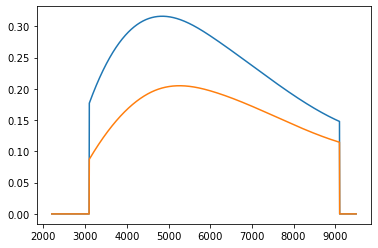

In [38]:
plt.plot(lmb, pla[3][0].data)
plt.plot(lmb, pla[2][0].data)

In [65]:
from astropy.modeling import models
from astropy import units as u

bb = models.BlackBody

In [66]:
p6000 = bb(6000 * u.K)

In [67]:
p6000

<BlackBody(temperature=6000. K, scale=1.)>

In [68]:
lmb_AA = lmb * u.AA

In [78]:
spec = p6000(lmb_AA)

In [79]:
spec

<Quantity [6.88831384e-07, 7.01276810e-07, 7.13878270e-07, ...,
           4.03729490e-05, 4.03675421e-05, 4.03621147e-05] erg / (cm2 Hz s sr)>

In [70]:
spec.value

array([6.88831384e-07, 7.01276810e-07, 7.13878270e-07, ...,
       4.03729490e-05, 4.03675421e-05, 4.03621147e-05])

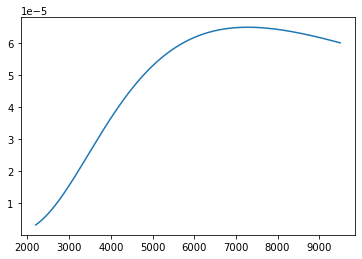

In [87]:
plt.plot(lmb, bb(7000 * u.K)(lmb_AA).value)

In [72]:
from astropy.visualization import quantity_support

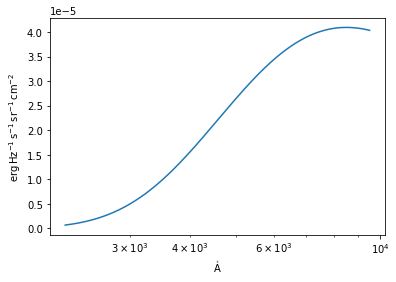

In [76]:
with quantity_support():
    plt.figure()
    plt.semilogx(lmb_AA, spec)
    #plt.axvline(p6000.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    plt.show()